In [14]:

import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
from numpy.lib.financial import _irr_dispatcher
from pandas.core.algorithms import mode, value_counts
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import os
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [53]:
if os.path.isdir("/kaggle/input"):
    file_name_train = "D:\Programy\Conda/train.csv"
    file_name_test = "D:\Programy\Conda/test.csv"
    file_name_output = "house_prices_submission.csv"
   
else:
    file_name_train = "train.csv"
    file_name_test = "test.csv"
    file_name_output = "house_prices_submission.csv"

train_data = pd.read_csv(file_name_train)
test_data = pd.read_csv(file_name_test)
id_data = test_data["Id"].to_frame()
df0 = train_data.copy()

In [18]:
dfdesc = train_data.describe().T
dfdesc

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
train_data.corrwith(train_data["SalePrice"], method="pearson")

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

In [56]:
columns_to_drop = ["Id", "Alley", "FireplaceQu",
                   "PoolQC", "Fence", "MiscFeature"]
df = train_data.drop(columns_to_drop, axis=1)
df2 = test_data.drop(columns_to_drop, axis=1)


In [57]:
dfcategorics = df.select_dtypes(include=['object'])
print(dfcategorics.columns)
dfnulls = df2.isnull().sum()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [58]:
def display_value_counts(df1):
    column_names = """
    BsmtQual         44
    BsmtCond         45
    BsmtFinType1     42
    BsmtFinType2     42
    KitchenQual       1
    GarageFinish     78
    GarageQual       78
    GarageCond       78
    """.strip()

    for line in column_names.splitlines():
        column_name = line.split()[0]
        print()
        print(column_name)
        value_counts = df1[column_name].value_counts()
        print(value_counts)

display_value_counts(df)
display_value_counts(df2)


BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

GarageFinish
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

GarageQual
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

BsmtQual
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

BsmtCond
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

BsmtFinType1
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Nam

In [59]:
def fillna(df1):

    df1["BsmtQual"] = df1["BsmtQual"].fillna("TA")
    df1["BsmtCond"] = df1["BsmtCond"].fillna("TA")
    df1["BsmtFinType1"] = df1["BsmtFinType1"].fillna("GLQ")
    df1["BsmtFinType2"] = df1["BsmtFinType2"].fillna("Unf")
    df1["KitchenQual"] = df1["KitchenQual"].fillna("TA")
    df1["GarageFinish"] = df1["GarageFinish"].fillna("Unf")
    df1["GarageQual"] = df1["GarageQual"].fillna("TA")
    df1["GarageCond"] = df1["GarageCond"].fillna("TA")

    
    df1["LotFrontage"] = df1["LotFrontage"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["MasVnrArea"] = df1["MasVnrArea"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["GarageYrBlt"] = df1["GarageYrBlt"].interpolate(method='linear', direction = 'forward', inplace=True)

    df1["BsmtFinSF1"] = df1["BsmtFinSF1"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["BsmtFinSF2"] = df1["BsmtFinSF2"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["BsmtUnfSF"] = df1["BsmtUnfSF"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["TotalBsmtSF"] = df1["TotalBsmtSF"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["BsmtFullBath"] = df1["BsmtFullBath"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["BsmtHalfBath"] = df1["BsmtHalfBath"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["GarageCars"] = df1["GarageCars"].interpolate(method='linear', direction = 'forward', inplace=True)
    df1["GarageArea"] = df1["GarageArea"].interpolate(method='linear', direction = 'forward', inplace=True)

fillna(df)
fillna(df2)

Text(0.5, 1.0, 'normalized data')

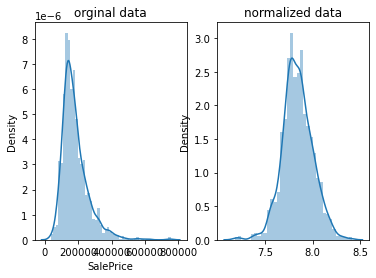

In [60]:
normalized_data=stats.boxcox(y)
fig,ax = plt.subplots(1,2)
sns.distplot(y,ax=ax[0])
ax[0].set_title("orginal data")
sns.distplot(normalized_data[0] , ax=ax[1])
ax[1].set_title("normalized data")

In [61]:
def build_df(df1):
    df = df1.copy()
    dfi = df.select_dtypes(include=['int64'])
    dff = df.select_dtypes(include=['float64'])

    ordinal_columns = """
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtFinType1
BsmtFinType2
HeatingQC
KitchenQual
GarageFinish
GarageQual
GarageCond
PavedDrive
    """.strip().split("\n")

    dfo = df[ordinal_columns]
    dfx = pd.concat([dfi, dfo, dff], axis=1)
    return dfx

df = build_df(df)
df2 = build_df(df2)

In [1]:
def encode_ordinal(df0, column_name: str, categories):
   
    df = df0.copy()
    mapping = {}
    for i, category in enumerate(categories):
        mapping[category] = i

    df[column_name] = df[column_name].map(mapping)
    return df


def encode_ordinal_columns(df0):
    df1 = df0.copy()
    values_qualities = ["Ex", "Gd", "TA", "Fa", "Po"]
    values_qualities_with_na = ["NA", "Ex", "Gd", "TA", "Fa", "Po"]
    values_fintype = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
    values_garagefinish = ["NA", "Unf", "RFn", "Fin"]
    values_paveddrive = ["N", "P", "Y"]

    df1 = encode_ordinal(df1, "ExterQual", values_qualities)
    df1 = encode_ordinal(df1, "ExterCond", values_qualities)
    df1 = encode_ordinal(df1, "BsmtQual", values_qualities_with_na)
    df1 = encode_ordinal(df1, "BsmtCond", values_qualities_with_na)
    df1 = encode_ordinal(df1, "BsmtFinType1", values_fintype)
    df1 = encode_ordinal(df1, "BsmtFinType2", values_fintype)
    df1 = encode_ordinal(df1, "HeatingQC", values_qualities)
    df1 = encode_ordinal(df1, "KitchenQual", values_qualities)
    df1 = encode_ordinal(df1, "GarageFinish", values_garagefinish)
    df1 = encode_ordinal(df1, "GarageQual", values_qualities_with_na)
    df1 = encode_ordinal(df1, "GarageCond", values_qualities_with_na)
    df1 = encode_ordinal(df1, "PavedDrive", values_paveddrive)
    return df1


df = encode_ordinal_columns(df)
df2 = encode_ordinal_columns(df2)

NameError: name 'df' is not defined

In [63]:
dfnulls1 = pd.isnull(df).sum()
dfnulls2 = pd.isnull(df2).sum()

target = "SalePrice"
x = df.drop(target, axis=1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=18)

In [64]:
models = [LinearRegression(), RandomForestRegressor(random_state=23),
          GradientBoostingRegressor(n_estimators=500, random_state=23)]

for model in models:
    model.fit(x_train, y_train)
    print("_" * 20)
    print(str(model))
    score = model.score(x_test, y_test)
    print(score)

____________________
LinearRegression()
0.8266277517887929
____________________
RandomForestRegressor(random_state=23)
0.8688979599292691
____________________
GradientBoostingRegressor(n_estimators=500, random_state=23)
0.9048846631085167


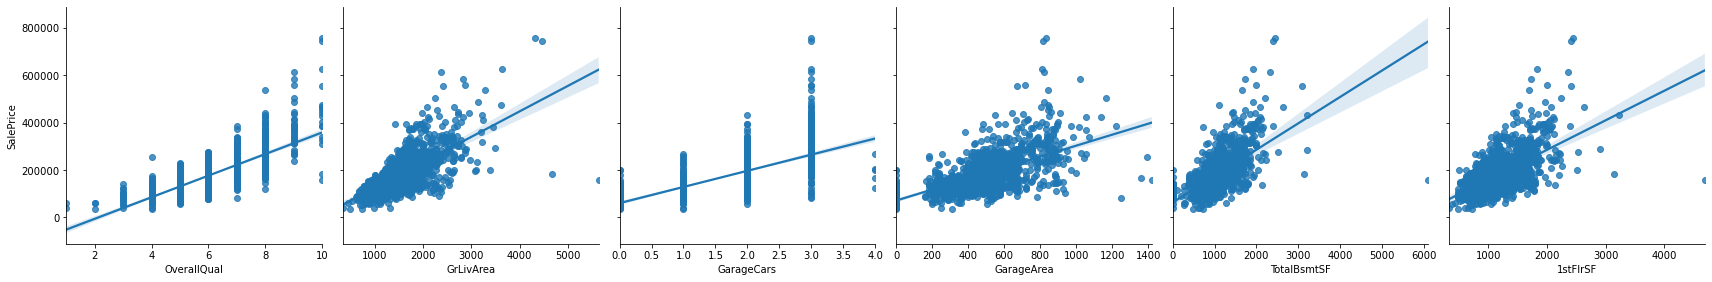

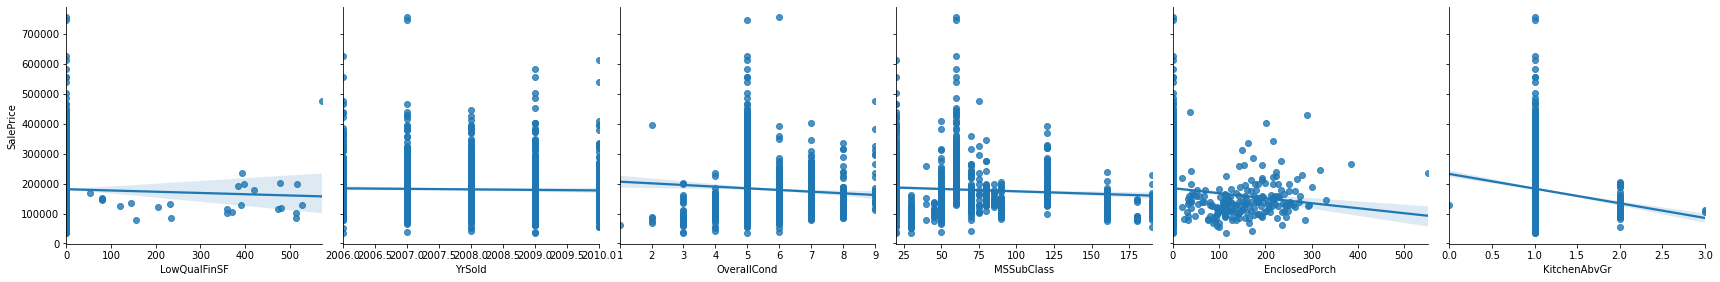

In [65]:
X = pd.read_csv('D:\Programy\Conda/train.csv') 
test = pd.read_csv('D:\Programy\Conda/test.csv')
y=X.SalePrice
X.head()
high_cor_feature = sns.PairGrid(X, y_vars=["SalePrice"], x_vars=["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF"], height=4)
high_cor_feature.map(sns.regplot)

low_cor_feature = sns.PairGrid(X, y_vars=["SalePrice"], x_vars=["LowQualFinSF","YrSold","OverallCond","MSSubClass","EnclosedPorch","KitchenAbvGr"], height=4)
low_cor_feature.map(sns.regplot)


<AxesSubplot:>

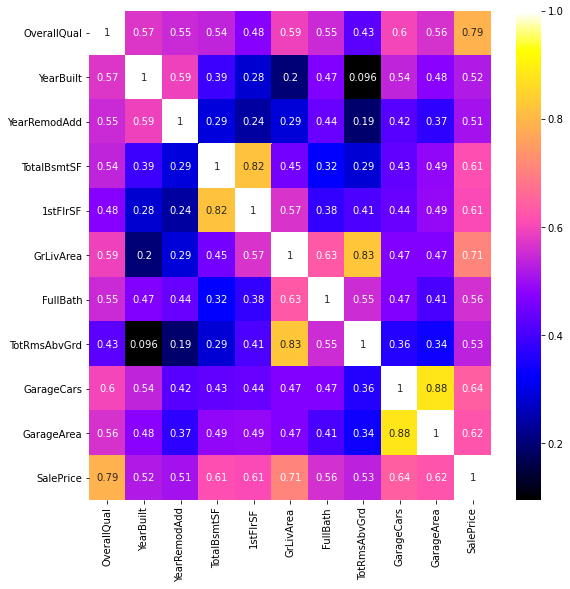

In [66]:
cor=X.corr()
high_cor=cor.index[cor["SalePrice"]>.5]
plt.figure(figsize=(9,9))
sns.heatmap(X[high_cor].corr(),annot=True,cmap='gnuplot2')

In [67]:
model = GradientBoostingRegressor(n_estimators=500, random_state=23)
model.fit(x_train, y_train)

predictions = model.predict(df2)

my_dict = {"Id": id_data["Id"], "SalePrice": predictions}
dfout = pd.DataFrame(my_dict)
dfout.to_csv(file_name_output, index=False)

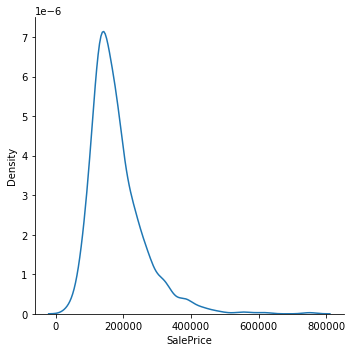

In [35]:
sns.displot(x, x=y, kind="kde")
